In [2]:
import random
import threading
import time
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [3]:
def matrix_multiplication(A, B, index, result):

    result[index] = np.dot(A, B)

In [4]:
def run_with_threads(num_threads):

    start_time = time.time()
    threads = []

    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=matrix_multiplication, args=(A, matrix, i, results))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    end_time = time.time()

    return end_time - start_time

In [5]:
A = np.random.rand(1000, 1000)

results = [None] * 100

matrices = [np.random.rand(1000, 1000) for _ in range(100)] # random matrices

results_table = []

num_threads=list(range(1,11))

time_taken=[]

for num_t in num_threads:
    ttime= run_with_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T="+str(num_t), round(ttime,4)))

ans = list(zip(*results_table))

print(tabulate(ans,tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))

+------------------+--------+--------+--------+--------+--------+--------+-------+--------+--------+--------+
| Threads          | T=1    | T=2    | T=3    | T=4    | T=5    | T=6    | T=7   | T=8    | T=9    | T=10   |
+------------------+--------+--------+--------+--------+--------+--------+-------+--------+--------+--------+
| Time taken (sec) | 7.0341 | 8.5268 | 7.8437 | 8.2602 | 7.7521 | 7.1145 | 8.224 | 6.6839 | 8.2847 | 6.6329 |
+------------------+--------+--------+--------+--------+--------+--------+-------+--------+--------+--------+


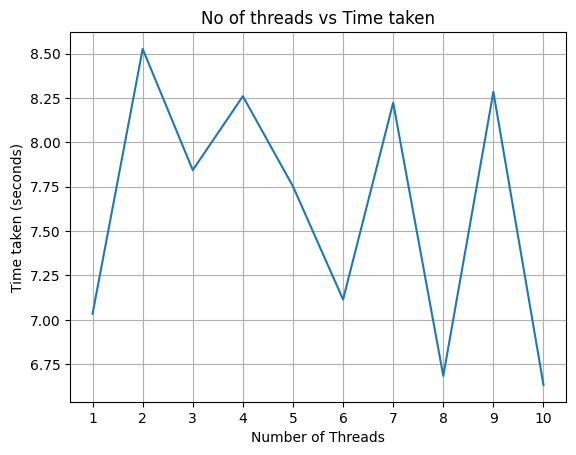

In [6]:
plt.plot(num_threads, time_taken)
plt.xlabel('Number of Threads')
plt.ylabel('Time taken (seconds)')
plt.title('No of threads vs Time taken')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()